In [66]:
# Imports
import pandas as pd
import numpy as np

In [67]:
# Load the raw data
df = pd.read_csv('Manually_decoded_training_data.csv', 
                       encoding='utf8', sep=';',
                       error_bad_lines=False)

In [68]:
# Displays the data
df

,Unnamed: 0,PMA_Index,PartNumber,Models,Beep Aircraft Short Name
0,0,19,A2187406810000,"Airbus (A300-B4-601, -B4-603, -B4-605R, -B4-62...",Airbus A300-600 (CF6-80C)
1,1,19,A2187406810000,"Airbus (A300-B4-601, -B4-603, -B4-605R, -B4-62...",Airbus A300-600 (PW4000)
2,2,57,A2181065500901,"Airbus (A300-B4-601, A300-B4-603, A300-B4-605R...",Airbus A300-600 (CF6-80C)
3,3,57,A2181065500901,"Airbus (A300-B4-601, A300-B4-603, A300-B4-605R...",Airbus A300-600 (PW4000)
4,4,112,A2188512002000,"Airbus (A300-B4-601, -B4-603, -B4-605R, -B4-62...",Airbus A300-600 (CF6-80C)
...,...,...,...,...,...
5793860,37095,1344480,362-599-9154WE,"Airbus (A300, A300, Model B4-601, A300, Model ...",Airbus A300-600 (CF6-80C)
5793861,37096,1344480,362-599-9154WE,"Airbus (A300, A300, Model B4-601, A300, Model ...",Airbus A300B4 (CF6-50)
5793862,37097,1344480,362-599-9154WE,"Airbus (A300, A300, Model B4-601, A300, Model ...",'Airbus A300-600 (CF6-80C)
5793863,37098,1344480,362-599-9154WE,"Airbus (A300, A300, Model B4-601, A300, Model ...",Airbus A300-600 (PW4000)


In [69]:
# Drop duplicate values
df = df.drop_duplicates(['Models','Beep Aircraft Short Name'], keep= 'last')

In [70]:
# Drops unused columns
df.drop(['Unnamed: 0', 'PMA_Index', 'PartNumber'], axis=1, inplace=True)

c:\Miniconda\envs\py37_pytorch\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [71]:
df

,Models,Beep Aircraft Short Name
16,"Airbus (A300B2-lA, -lC, -203)",Airbus A300B2 (CF6-50)
69,"Airbus (A310 Series: A310 Model 203, A310 Mode...",Airbus A320 (CFM56-5B)
70,"Airbus (A310 Series: A310 Model 203, A310 Mode...",Airbus A320 (CFM56-5A)
71,"Airbus (A310 Series: A310 Model 203, A310 Mode...",Airbus A320 (V2500-A1)
72,"Airbus (A310 Series: A310 Model 203, A310 Mode...",Airbus A320 (V2500-A5)
...,...,...
5793860,"Airbus (A300, A300, Model B4-601, A300, Model ...",Airbus A300-600 (CF6-80C)
5793861,"Airbus (A300, A300, Model B4-601, A300, Model ...",Airbus A300B4 (CF6-50)
5793862,"Airbus (A300, A300, Model B4-601, A300, Model ...",'Airbus A300-600 (CF6-80C)
5793863,"Airbus (A300, A300, Model B4-601, A300, Model ...",Airbus A300-600 (PW4000)


In [72]:
# Create a dataframe with unique counts of airplane models
df_counts = df['Beep Aircraft Short Name'].value_counts().rename_axis('unique_values').reset_index(name='counts')
df_counts = df_counts.sort_values('counts')

In [73]:
df_counts

,unique_values,counts
461,Gulfstream G-VII (PW800),1
453,Boeing 777-8 (GE9X),1
454,Harbin Y12 (HS-6),1
455,Douglas Aircraft DC-6,1
460,AH EC155,1
...,...,...
4,Boeing 747-200 (CF6-50),14315
3,Boeing 747-200 (JT9D),14759
2,Boeing 747-400 (RB211-524),16191
1,Boeing 747-400 (PW4000),17579


In [74]:
# One hot encodes the airplane models
dummies = pd.get_dummies(df['Beep Aircraft Short Name'])

In [75]:
# Concats the dummies with the orginal data
df = pd.concat([df, dummies], axis=1)

In [76]:
# Counts the data by each string
df = df.groupby('Models').max()

In [77]:
df.reset_index(inplace=True)

In [78]:
columns = df_counts['unique_values'].values

In [79]:
df_copy = df.copy()

In [80]:
# Function for dropping rows
def drop_rows(df, column):
    df = df.drop(df[df[column] == 1][5000:].index)
    return df

# Function for adding rows
def add_rows(df, column):
    
    size = 5000 - df[df[column] == 1].shape[0]

    w = df[df[column] == 1][columns].max().values.sum()

    if w > 1:
        n_rows = int(size/w)
    else:
        n_rows = size
    
    df_append = df[df[column] == 1].sample(n_rows, replace=True)
    df = df.append(df_append)
    return df

In [81]:
# Over/under samples the data
for i, model in enumerate(columns):
    shape = df[df[model] == 1].shape[0]
    if shape > 5000:
        df = drop_rows(df, model)
    else:
        df = add_rows(df, model)
    if i % 10 == 0:
        print(i)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460


In [82]:
# Checks the sum of each column
for column in columns:
    print(df[column].sum())

5000
0
2506
5000
3328
0
5000
5000
2389
5000
5000
5000
5000
3751
5000
5000
2284
2711
2284
2284
2284
2284
2284
2489
2997
3514
3514
5000
5000
5000
5000
1927
1927
886
1927
1927
626
626
3339
1082
808
808
808
34
3035
3526
908
2417
811
1353
1046
687
814
687
687
3015
2307
1033
1261
817
1276
5
1907
3287
3287
146
3516
745
146
0
1343
1286
1343
2582
827
827
636
1303
499
3587
417
258
1554
2335
1554
1554
1072
761
693
2448
793
1119
843
843
3077
1097
1238
1200
2829
2829
34
2830
2473
0
0
0
36
1213
4
8
7
291
761
918
889
1541
1541
1541
1541
2549
5000
867
1332
1550
1103
536
2561
3129
1571
1343
1353
795
662
1454
1073
1224
683
497
804
944
50
1006
1174
855
855
112
3012
3012
3012
698
3012
3012
3012
3012
1220
1220
862
2148
2148
2148
2148
2148
2149
1238
2025
1238
1238
1238
927
865
2151
923
1594
706
3212
1304
2276
874
1307
935
1704
1316
3041
1241
2168
1216
2863
1265
640
2465
2465
2465
2465
2738
2472
1720
735
1724
1276
2292
2480
1138
1338
2325
3422
683
809
762
1276
1943
1943
1943
874
1695
2203
2334
927
2216
108
1

In [83]:
# Function for adding more rows
def add_rows_2(df, df_copy, column):
    df_append = df_copy[df_copy[column] == 1].sample(1000, replace=True)
    df = df.append(df_append)
    return df

In [84]:
# Adds more rows again
for i, model in enumerate(columns):
    shape = df[df[model] == 1].shape[0]
    
    if shape < 4000:
        df = add_rows_2(df, df_copy, model)
    if i % 10 == 0:
        print(i)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460


<AxesSubplot:>

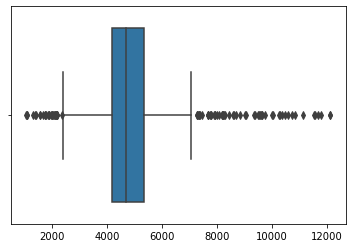

In [85]:
# Displays distribution of each column
import seaborn as sns
sns.boxplot(x=df[columns].sum())

In [86]:
# Creates the prediction list
df['labels'] = df.iloc[:,2:].values.tolist()

In [87]:
df.iloc[:,2:].T[:462].sum().describe()

count    344889.000000
mean          6.748995
std           9.743752
min           1.000000
25%           1.000000
50%           3.000000
75%           8.000000
max          73.000000
dtype: float64

In [88]:
# Creates final dataframe
result = df[['Models', 'labels']]

In [89]:
# Shuffles final dataframe
result = result.sample(frac=1)

In [90]:
result

,Models,labels
44987,Boeing (787-10),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
74117,"Pratt & Whitney Canada, Corp. (PT6C-67C)","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
54434,Embraer Empresa (ERJ 190-100 IGW) Embraer Empr...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
10644,"Airbus Helicopters (AS332L, AS332L1)","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
17610,"Boeing (707-100 Long Body, 707-100B Long/Short...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
64077,McDonnell Douglas (DC-3-TP67),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
74887,"Rolls Royce Corporation (AE 3007C, AE 3007A, A...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
73571,"Pratt & Whitney Canada (PT6A-6, -6A, -6B, -6/C...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
10877,Airbus Helicopters Deutschland GmbH (BO105S),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [91]:
# Gets uniqie string values
sampled_models = pd.DataFrame()
sampled_models['uniqueModel'] = result['Models'].unique()

In [92]:
# gets number of unique strings
n = sampled_models.shape[0]

In [93]:
# Creates train data
train = sampled_models[:int(n*0.7)].merge(result, left_on='uniqueModel', right_on='Models')
train.drop('uniqueModel', axis=1, inplace=True)

In [94]:
# Creates valid data
valid = sampled_models[int(n*0.7):int(n*0.85)].merge(result, left_on='uniqueModel', right_on='Models')
valid.drop('uniqueModel', axis=1, inplace=True)

In [95]:
# Creates test data
test = sampled_models[int(n*0.85):].merge(result, left_on='uniqueModel', right_on='Models')
test.drop('uniqueModel', axis=1, inplace=True)

In [96]:
# shuffles the data
train = train.sample(frac=1)
valid = valid.sample(frac=1)
test = test.sample(frac=1)

In [97]:
train

,Models,labels
110309,"Pratt WhitneyCanada Corp (PW1519G, PW1521G, PW...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
76794,"Airbus Helicopter (AS332C, AS332L, AS332L1)","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
125339,"Airbus Helicopter (EC130B4, AS350B3)","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
292166,Piper (PA-42-1000),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
299489,"Airbus (300-600, 310-200, -300, 320-300)","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
175542,"Airbus (A300-600 A300 Model B4-601, A300 Model...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
118660,"Eurocopter France (AS332C, L)","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
10248,McDonnell Douglas (DC-6),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
287413,Honeywell (T5313B series engine),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [98]:
valid

,Models,labels
6981,"Bell (205, 205A-1, 212 with STC SR03018AT-D in...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
650,Hawker Beechcraft Corporation (BAe. 125-800A H...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5219,"Lycoming (O-320-no suffix, A1A, A1B, A2A, A2B,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2360,"Pratt & Whitney Canada (PT6A-6, -6A, -6B, -20,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2796,"Airbus (A321-111, -112, -131, -211, -231, A330...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
1952,"McDonnell Douglas (Models DC-9-21, -31, -32, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5720,"Airbus (A320-232, A320-233, A319-132)","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6910,"Bombardier, Inc. (DHC-8-300 Series)","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5708,"Boeing (707-100 Long Body, 707-100B Long Body,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [99]:
test

,Models,labels
7652,"Boeing (707-320, 737-100, -200, -300, -400, -5...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2643,"MCDONNELL DOUGLAS (MD-10-10F, MD-10-30F, DC10-...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
968,"Bell Helicopter Textron (206A, 206B, 206L, 206...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4730,"Lycoming (O-235-C1, C1B, C1C, C2A, C2B, C2C, E...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3294,"BOEING (737-300, -400, -500)","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
4432,Boeing (727 737 747 series),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
645,"McDonnell Douglas (DC-9-12, DC-9-13, DC-9-14, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5856,"Beechcraft Corporation (B200, 200, 200T)","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5103,"Airbus (A310 Models -204, -222)","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [43]:
# Saves train, valid and test data
train.to_csv('train_data_020121.csv', index=False)
valid.to_csv('valid_data_020121.csv', index=False)
test.to_csv('test_data_020121.csv', index=False)